데이터 확인

In [3]:
import pandas as pd
df=pd.read_csv('train.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB
None


In [4]:
print(df.describe())

       wind_direction  sky_condition  precipitation_form  wind_speed  \
count      273.000000     273.000000          273.000000  273.000000   
mean       202.750967       2.288256            0.100963    2.480963   
std         56.659232       0.961775            0.203193    0.884397   
min         57.047000       1.000000            0.000000    0.753000   
25%        171.541000       1.405000            0.000000    1.820000   
50%        209.774000       2.167000            0.000000    2.411000   
75%        238.412000       3.000000            0.088000    2.924000   
max        321.622000       4.000000            1.000000    5.607000   

         humidity    low_temp   high_temp  Precipitation_Probability  \
count  273.000000  273.000000  273.000000                 273.000000   
mean    56.745491   13.795249   23.384733                  16.878103   
std     12.351268    5.107711    5.204605                  16.643772   
min     24.831000    1.938000    9.895000                   0.0

In [5]:
print(df.head())

    date_time  wind_direction  sky_condition  precipitation_form  wind_speed  \
0  2018-04-01         207.500          4.000               0.000       3.050   
1  2018-04-02         208.317          2.950               0.000       3.278   
2  2018-04-03         213.516          2.911               0.000       2.690   
3  2018-04-04         143.836          3.692               0.425       3.138   
4  2018-04-05          95.905          4.000               0.723       3.186   

   humidity  low_temp  high_temp  Precipitation_Probability  number_of_rentals  
0    75.000    12.600     21.000                     30.000              22994  
1    69.833    12.812     19.000                     19.500              28139  
2    74.879    10.312     15.316                     19.113              26817  
3    71.849     8.312     12.368                     43.493              26034  
4    73.784     5.875     10.421                     63.378               2833  


결측치, 이상치 확인

In [6]:
print(df.isnull().sum())

date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
number_of_rentals            0
dtype: int64


IndexError: index 3 is out of bounds for axis 0 with size 3

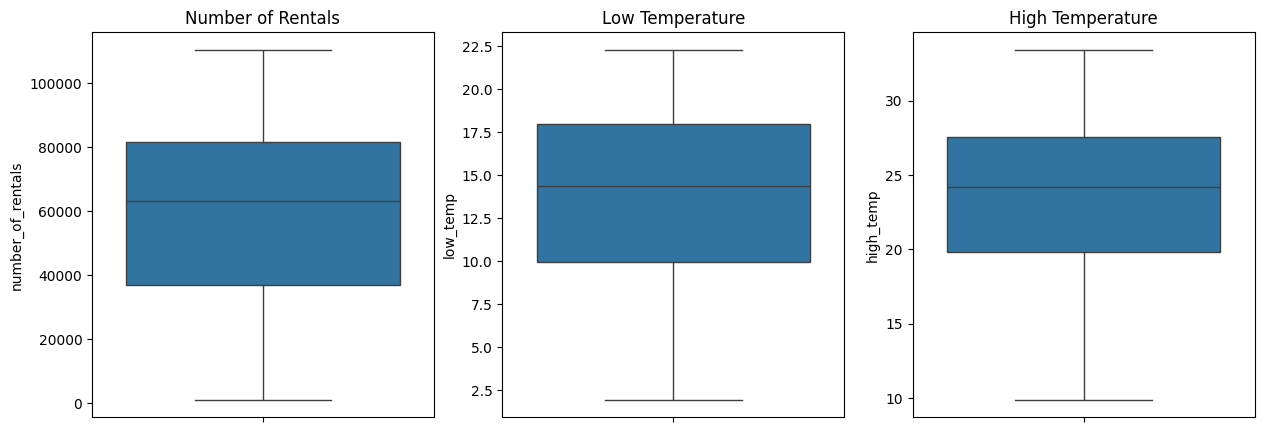

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(15,5))

sns.boxplot(data=df['number_of_rentals'], ax=ax[0])
ax[0].set_title('Number of Rentals')
sns.boxplot(data=df['low_temp'], ax=ax[1])
ax[1].set_title('Low Temperature')
sns.boxplot(data=df['high_temp'], ax=ax[2])
ax[2].set_title('High Temperature')

plt.show()

데이터 분포 확인

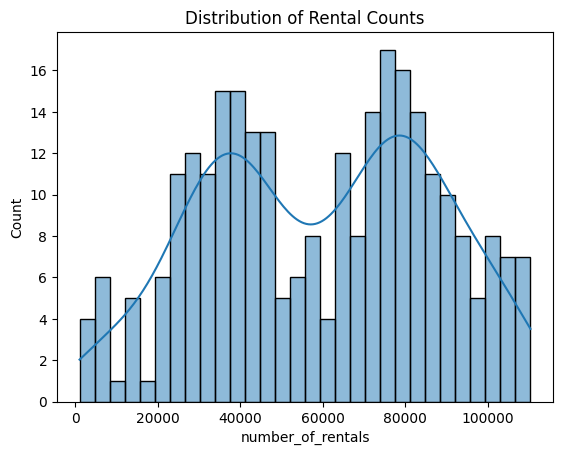

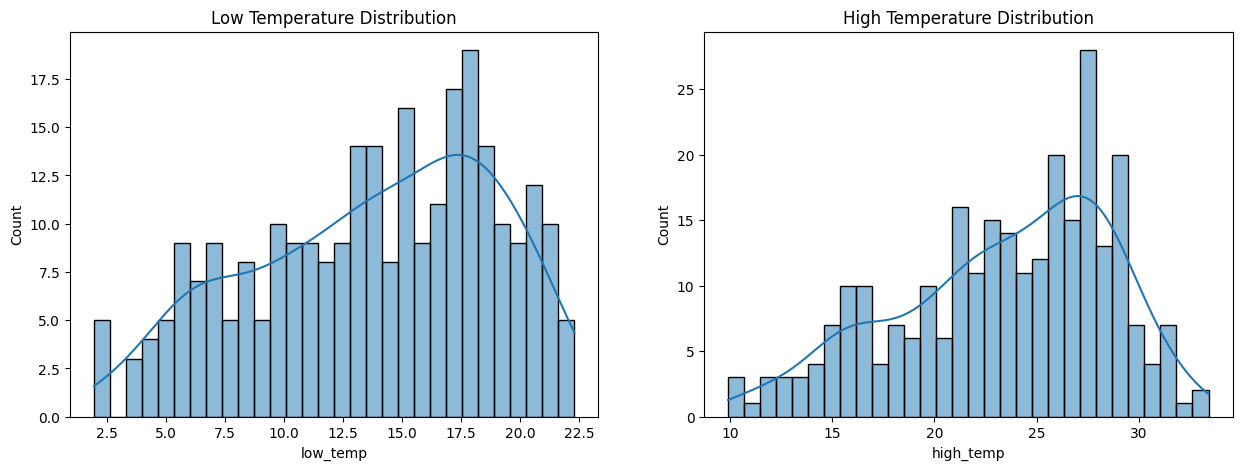

In [8]:
sns.histplot(data=df['number_of_rentals'], bins=30, kde=True)
plt.title('Distribution of Rental Counts')
plt.show()

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.histplot(data=df['low_temp'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Low Temperature Distribution')
sns.histplot(data=df['high_temp'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('High Temperature Distribution')
plt.show()


산점도로 low temp와 high temp에 대한 대여량 분포를 확인

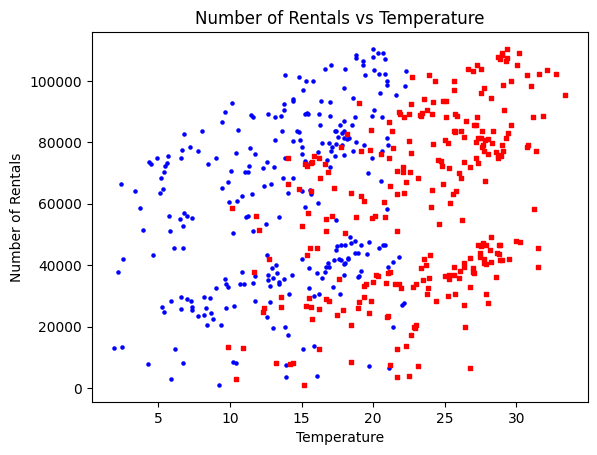

In [9]:

plt.scatter(df['low_temp'], df['number_of_rentals'], color='blue', marker='o', s=5)
plt.scatter(df['high_temp'], df['number_of_rentals'], color='red', marker='s', s=5)

plt.xlabel('Temperature')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals vs Temperature')
plt.show()

가장 대여수가 많은/ 적은 high temp와 low temp

In [10]:
low_temp_rentals = df.groupby('low_temp')['number_of_rentals'].mean()
high_temp_rentals = df.groupby('high_temp')['number_of_rentals'].mean()

max_low_temp = low_temp_rentals.idxmax()
max_high_temp = high_temp_rentals.idxmax()

print(f"대여 수가 가장 많은 Low Temp: {max_low_temp}")
print(f"대여 수가 가장 많은 High Temp: {max_high_temp}")

min_low_temp = low_temp_rentals.idxmin()
min_high_temp = high_temp_rentals.idxmin()

print(f"대여 수가 가장 적은 Low Temp: {min_low_temp}")
print(f"대여 수가 가장 적은 High Temp: {min_high_temp}")

대여 수가 가장 많은 Low Temp: 20.312
대여 수가 가장 많은 High Temp: 29.368
대여 수가 가장 적은 Low Temp: 9.25
대여 수가 가장 적은 High Temp: 15.158


In [11]:
correlation_low = df['low_temp'].corr(df['number_of_rentals'])
correlation_high = df['high_temp'].corr(df['number_of_rentals'])

print(f"Low Temp와 Number of Rentals 간의 상관관계: {correlation_low:.2f}")
print(f"High Temp와 Number of Rentals 간의 상관관계: {correlation_high:.2f}")

Low Temp와 Number of Rentals 간의 상관관계: 0.32
High Temp와 Number of Rentals 간의 상관관계: 0.42


최저기온, 최고기온 구간 별 대여 수 확인

최저기온 구간별 대여량:
low_temp_bin
(1, 6]      49869.576923
(6, 11]     45939.732143
(11, 16]    60182.850000
(16, 21]    69995.560000
(21, 26]    52777.363636
Name: number_of_rentals, dtype: float64

최고기온 구간별 대여량:
high_temp_bin
(9, 14]     30001.615385
(14, 19]    47936.630435
(19, 24]    52928.648649
(24, 29]    65783.864865
(29, 34]    84487.379310
Name: number_of_rentals, dtype: float64


C:\Users\김은교\AppData\Local\Temp\ipykernel_4968\1815396242.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  low_temp_rentals = df.groupby('low_temp_bin')['number_of_rentals'].mean()
C:\Users\김은교\AppData\Local\Temp\ipykernel_4968\1815396242.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_temp_rentals = df.groupby('high_temp_bin')['number_of_rentals'].mean()


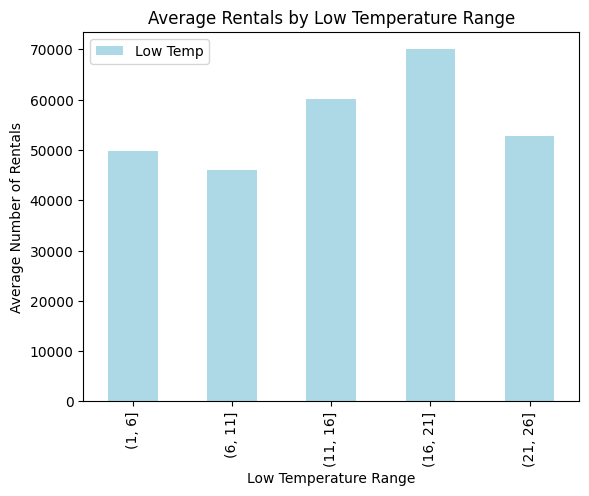

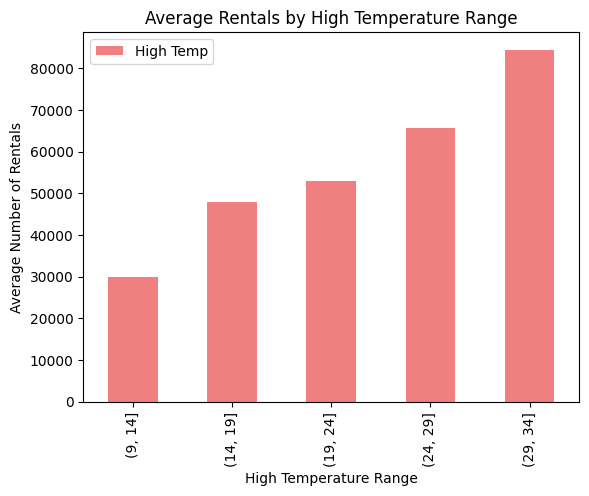

최저기온 대여량이 가장 많은 구간: (16, 21], 평균 대여량: 69995.56
최고기온 대여량이 가장 많은 구간: (29, 34], 평균 대여량: 84487.37931034483


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 최저기온 데이터 구간화 및 평균 계산
bins = range(int(df['low_temp'].min()), int(df['low_temp'].max()) + 5, 5)
df['low_temp_bin'] = pd.cut(df['low_temp'], bins)
low_temp_rentals = df.groupby('low_temp_bin')['number_of_rentals'].mean()

# 최고기온 데이터 구간화 및 평균 계산
bins = range(int(df['high_temp'].min()), int(df['high_temp'].max()) + 5, 5)
df['high_temp_bin'] = pd.cut(df['high_temp'], bins)
high_temp_rentals = df.groupby('high_temp_bin')['number_of_rentals'].mean()

# 최저기온 대여량 출력
print("최저기온 구간별 대여량:")
print(low_temp_rentals)

# 최고기온 대여량 출력
print("\n최고기온 구간별 대여량:")
print(high_temp_rentals)

# 최저기온 그래프
low_temp_rentals.plot(kind='bar', color='lightblue', label='Low Temp')
plt.xlabel('Low Temperature Range')
plt.ylabel('Average Number of Rentals')
plt.title('Average Rentals by Low Temperature Range')
plt.legend()
plt.show()

# 최고기온 그래프
high_temp_rentals.plot(kind='bar', color='lightcoral', label='High Temp')
plt.xlabel('High Temperature Range')
plt.ylabel('Average Number of Rentals')
plt.title('Average Rentals by High Temperature Range')
plt.legend()
plt.show()

# 최저기온
max_low_temp_bin = low_temp_rentals.idxmax()
max_low_temp_value = low_temp_rentals.max()
print(f"최저기온 대여량이 가장 많은 구간: {max_low_temp_bin}, 평균 대여량: {max_low_temp_value}")

# 최고기온
max_high_temp_bin = high_temp_rentals.idxmax()
max_high_temp_value = high_temp_rentals.max()
print(f"최고기온 대여량이 가장 많은 구간: {max_high_temp_bin}, 평균 대여량: {max_high_temp_value}")

평균 기온에 대한 대여 수 확인

In [13]:
df['avg_temp']=((df['low_temp']+df['high_temp'])/2).round(2)

avg_temp_rentals = df.groupby('avg_temp')['number_of_rentals'].mean()
max_avg_temp = avg_temp_rentals.idxmax()
max_avg_temp_value = avg_temp_rentals.max()
min_avg_temp = avg_temp_rentals.idxmin()
min_avg_temp_value = avg_temp_rentals.min()

print(f"대여 수가 가장 많은 평균 온도: {max_avg_temp}, 평균 대여 수: {max_avg_temp_value:.2f}")
print(f"대여 수가 가장 적은 평균 온도: {min_avg_temp}, 평균 대여 수: {min_avg_temp_value:.2f}")

대여 수가 가장 많은 평균 온도: 24.84, 평균 대여 수: 109210.00
대여 수가 가장 적은 평균 온도: 12.2, 평균 대여 수: 1037.00


C:\Users\김은교\AppData\Local\Temp\ipykernel_4968\1331385313.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_temp_rentals = df.groupby('avg_temp_bin')['number_of_rentals'].mean()


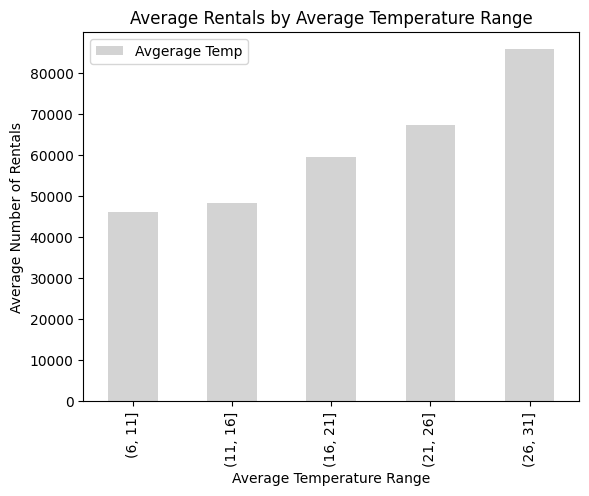

In [14]:
bins = range(int(df['avg_temp'].min()), int(df['avg_temp'].max()) + 5, 5)
df['avg_temp_bin'] = pd.cut(df['avg_temp'], bins)
avg_temp_rentals = df.groupby('avg_temp_bin')['number_of_rentals'].mean()

avg_temp_rentals.plot(kind='bar', color='lightgray', label='Avgerage Temp')
plt.xlabel('Average Temperature Range')
plt.ylabel('Average Number of Rentals')
plt.title('Average Rentals by Average Temperature Range')
plt.legend()
plt.show()

일교차에 대한 대여 수 확인

In [15]:
# 일교차 계산
df['temp_difference'] = df['high_temp'] - df['low_temp']

# 일교차와 대여량의 상관관계 계산
correlation_temp_diff = df['temp_difference'].corr(df['number_of_rentals'])
print(f"일교차와 대여량의 상관관계: {correlation_temp_diff:.2f}")

일교차와 대여량의 상관관계: 0.28


temp_diff_bin
(3, 4]       7583.500000
(4, 5]      39748.000000
(5, 6]      23812.000000
(6, 7]      40636.250000
(7, 8]      55425.555556
(8, 9]      67887.446809
(9, 10]     57921.000000
(10, 11]    64039.229167
(11, 12]    66749.000000
(12, 13]    64286.250000
Name: number_of_rentals, dtype: float64
대여량이 가장 많은 일교차 구간: (8, 9]
해당 구간의 평균 대여량: 67887.44680851063


C:\Users\김은교\AppData\Local\Temp\ipykernel_4968\2402528792.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_by_temp_diff = df.groupby('temp_diff_bin')['number_of_rentals'].mean()


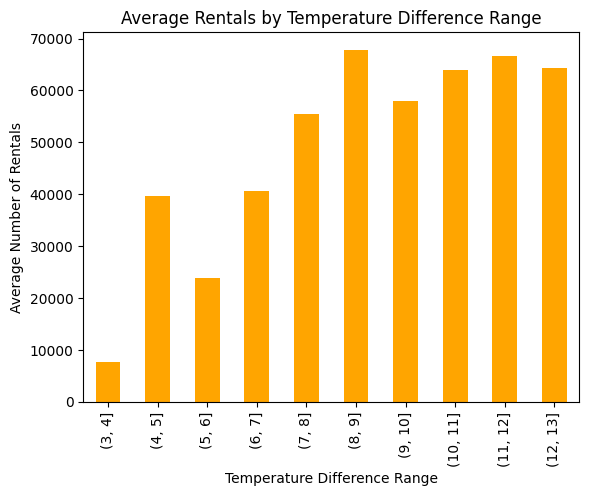

In [16]:
# 일교차 구간 정의
bins = range(int(df['temp_difference'].min()), int(df['temp_difference'].max()) + 1, 1)
df['temp_diff_bin'] = pd.cut(df['temp_difference'], bins)

# 구간별 평균 대여량 계산
rentals_by_temp_diff = df.groupby('temp_diff_bin')['number_of_rentals'].mean()

# 확인
print(rentals_by_temp_diff)

max_temp_diff_bin = rentals_by_temp_diff.idxmax()
max_temp_diff_value = rentals_by_temp_diff.max()

print(f"대여량이 가장 많은 일교차 구간: {max_temp_diff_bin}")
print(f"해당 구간의 평균 대여량: {max_temp_diff_value}")

import matplotlib.pyplot as plt

rentals_by_temp_diff.plot(kind='bar', color='orange')
plt.xlabel('Temperature Difference Range')
plt.ylabel('Average Number of Rentals')
plt.title('Average Rentals by Temperature Difference Range')
plt.show()

월별 대여 수 확인

In [17]:
# date_time 열을 datetime 형식으로 변환
df['date_time'] = pd.to_datetime(df['date_time'])

# 확인
print(df['date_time'].head())

0   2018-04-01
1   2018-04-02
2   2018-04-03
3   2018-04-04
4   2018-04-05
Name: date_time, dtype: datetime64[ns]


In [18]:
# 연도 추출
df['year'] = df['date_time'].dt.year

# 월 추출
df['month'] = df['date_time'].dt.month

# 요일 추출
df['day_of_week'] = df['date_time'].dt.day_name()

# 확인
print(df[['date_time', 'month', 'day_of_week']].head())
print(df['month'].value_counts())
print(df['day_of_week'].value_counts())
print(df['year'].value_counts())

   date_time  month day_of_week
0 2018-04-01      4      Sunday
1 2018-04-02      4      Monday
2 2018-04-03      4     Tuesday
3 2018-04-04      4   Wednesday
4 2018-04-05      4    Thursday
month
5    93
4    90
6    90
Name: count, dtype: int64
day_of_week
Sunday       39
Monday       39
Tuesday      39
Wednesday    39
Thursday     39
Friday       39
Saturday     39
Name: count, dtype: int64
year
2018    91
2019    91
2020    91
Name: count, dtype: int64


month
4    47925.277778
5    61062.731183
6    69687.333333
Name: number_of_rentals, dtype: float64


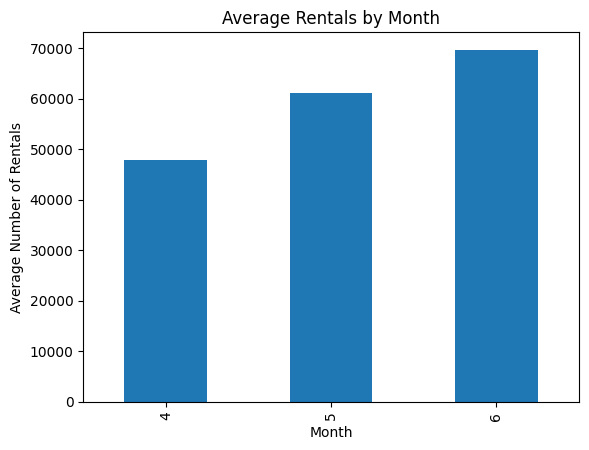

In [19]:
# 월별 평균 대여량 계산
rentals_by_month = df.groupby('month')['number_of_rentals'].mean()

# 확인
print(rentals_by_month)

# 막대그래프 생성
rentals_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Number of Rentals')
plt.title('Average Rentals by Month')
plt.show()

In [20]:
# month와 일교차의 상관관계 계산
correlation_month_diff = df['month'].corr(df['temp_difference'])
print(f"month와 일교차의 상관관계: {correlation_month_diff:.2f}")

#일교차와 강수확률의 상관관계 계산
correlation_temp_diff_rain = df['temp_difference'].corr(df['Precipitation_Probability'])
print(f"일교차와 강수확률의 상관관계: {correlation_temp_diff_rain:.2f}")

month와 일교차의 상관관계: -0.08
일교차와 강수확률의 상관관계: -0.59


month
4    9.657189
5    9.847860
6    9.254789
Name: temp_difference, dtype: float64


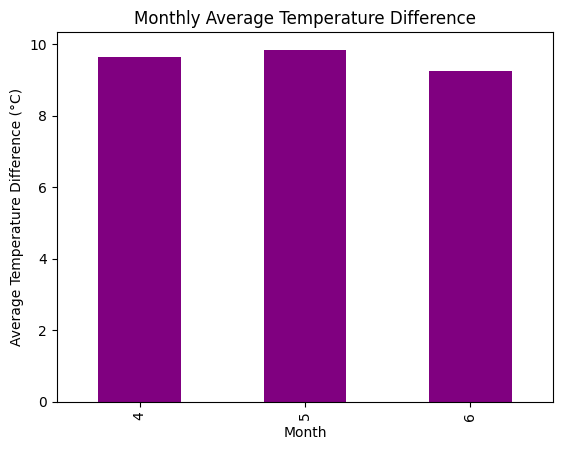

In [21]:

# 월별 평균 일교차 계산
monthly_temp_diff = df.groupby('month')['temp_difference'].mean()

# 결과 확인
print(monthly_temp_diff)

# 막대그래프 생성
monthly_temp_diff.plot(kind='bar', color='purple')
plt.xlabel('Month')
plt.ylabel('Average Temperature Difference (°C)')
plt.title('Monthly Average Temperature Difference')
plt.show()

In [22]:
# 일교차가 가장 적은 값 찾기
min_temp_diff = df['temp_difference'].min()

# 최솟값을 가지는 날짜 찾기
min_temp_diff_date = df[df['temp_difference'] == min_temp_diff]

# 결과 확인
print(min_temp_diff_date[['date_time', 'temp_difference']])

"""
개인적으로 어떤 날에 일교차가 가장 작은지 확인해 보고 싶어서 작성하였습니다
"""

    date_time  temp_difference
45 2018-05-16            3.417


'\n개인적으로 어떤 날에 일교차가 가장 작은지 확인해 보고 싶어서 작성하였습니다\n'

In [23]:
# 일교차와 최고기온의 상관관계 계산
correlation_high_and_diff = df['high_temp'].corr(df['temp_difference'])
print(f"high temp와 일교차의 상관관계: {correlation_high_and_diff:.2f}")

high temp와 일교차의 상관관계: 0.24


변수들 간 heatmap 확인

수치형 변수: Index(['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed',
       'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability',
       'number_of_rentals', 'avg_temp', 'temp_difference'],
      dtype='object')
                           wind_direction  sky_condition  precipitation_form  \
wind_direction                   1.000000      -0.386683           -0.348118   
sky_condition                   -0.386683       1.000000            0.673814   
precipitation_form              -0.348118       0.673814            1.000000   
wind_speed                       0.079138       0.140816            0.287325   
humidity                        -0.217112       0.651321            0.610185   
low_temp                        -0.135984       0.088365            0.045704   
high_temp                       -0.029813      -0.151566           -0.143994   
Precipitation_Probability       -0.394495       0.912601            0.910609   
number_of_rentals                0.2099

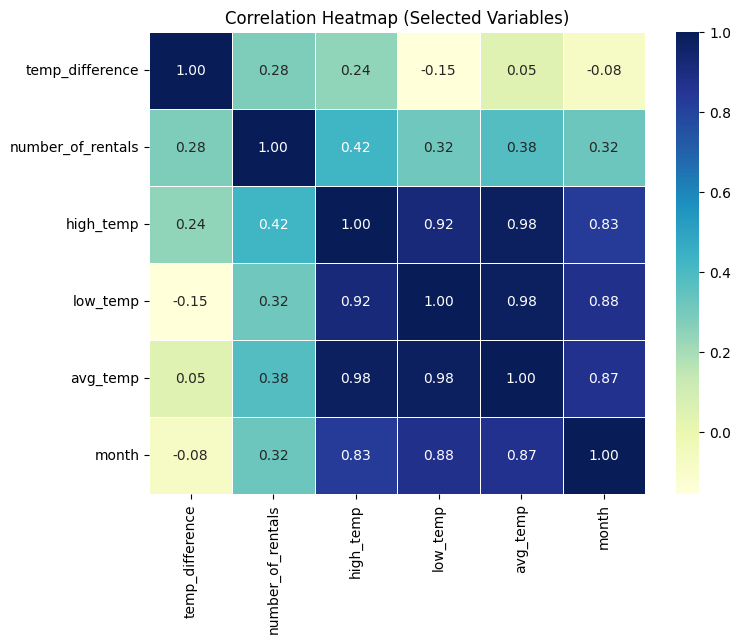

In [24]:

# 상관계수를 계산할 변수들 선택
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("수치형 변수:", numerical_columns)

# 상관계수 계산
correlation_matrix = df[numerical_columns].corr()

# 상관계수 확인
print(correlation_matrix)

# 특정 변수 필터링
selected_columns = ['temp_difference', 'number_of_rentals', 'high_temp', 'low_temp', 'avg_temp', 'month']
correlation_matrix = df[selected_columns].corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Selected Variables)')
plt.show()